# Chapter 16. NLP Workshop 7
# Building Chatbot with TensorFlow and Transformer Technology

## 16.1 Introduction

In this workshop, you will use the NLP implementation tools you have learnt in the previous workshop to design and implement a Live <font color='blue'>chatbot system</font>.

These basic NLP implementation techniques include: spaCy, TensorFlow, Keras and one of the most important tools in NLP system implementation tool - the Transformer Technology.

First, we will explore the basic technical requirements for the implementation of chatbot system. 

Second, we will give an overview of AI Chatbot system and the basic component in a typical chatbot system. 

Third, we will have a step-by-step implementation of the chatbot by the integration of TensorFlow and Keras with Transformer Technology. 

In order to present a live example of how a domain-based chatbot system work, we are using movie conversations provided by Cornell Large Movie Dataset - a well known conversation dataset with over 200,000 movie dialogs of 10,000+ movie characters. 

Moreover, besides system implementation details, we also present the system evaluation metrics and live chatting examples as demonstration. Of course, readers are also welcome to test the movie chatbot system with any dialogs. 


## 16.2 Technical requirements

To proceed with this workshop, make sure that you have installed <font color='blue'>Transformers</font>, <font color='blue'>Tensorflow</font> and <font color='blue'>spaCy</font> and also some basic Python modules including: <font color='blue'>numpy</font> and <font color='blue'>scikit-learn</font> in your machine (if you are using your own PC/notebook computer instead of the campus JupyterHub Server).

To install these packages, using pip install commands:-
- pip install spacy (note: version 3.4.1 is being used)
- pip install tensorflow (note: version 2.4.1 is being used)
- pip install transformers 
- pip install scikit-learn
- pip install numpy

Besides, the data files needed to be used in this workshop can be found in the DATA sub-directory of the NLPWorkshop7 directory of the JupyterHub Server as well. 

## 16.3 AI Chatbot in a Nutshell

### 16.3.1 What is a Chatbot?

We welcome you to our last and very exciting chapter, where you'll be designing a chatbot NLU pipeline with spaCy and TensorFlow. In this chapter, you'll learn the NLU techniques for extracting meaning from multiturn chatbot-user interactions. By learning and applying these techniques, you'll take a step into conversational AI development.  

Before diving into the technical details, there's one fundamental question: what is a chatbot? Where can we find one? What exactly does conversational AI mean?

Conversational artificial intelligence (conversational AI) is a field of machine learning that aims to create technology that enables users to have text- or speech-based interactions with machines. Chatbots, virtual assistants, and voice assistants are typical conversational AI products.

A chatbot is a software application that is designed to make conversations with humans in chat applications. Chatbots are popular in a wide variety of commercial areas including HR, marketing and sales, banking, and healthcare, as well as in personal, non-commercial areas such as small talk. Many commercial companies, such as Sephora (Sephora owns two chatbots – a virtual make-up artist chatbot on Facebook messenger platform and a customer service chatbot again on Facebook messenger), IKEA (IKEA have a customer service chatbot called Anna), AccuWeather, and many more, own customer service and FAQ chatbots.

Instant messaging services such as Facebook Messenger and Telegram provide interfaces to developers for connecting their bots. These platforms provide detailed guidelines for developers as well, such as the Facebook Messenger API documentation: (https://developers.facebook.com/docs/messenger-platform/getting-started/quick-start/) or the Telegram bot API documentation: (https://core.telegram.org/bots).

A virtual assistant is also a software agent that performs some tasks upon user request or question. A well-known example is Amazon Alexa. Alexa is a voice-based virtual assistant and can perform many tasks, including playing music, setting alarms, reading audiobooks, playing podcasts, and giving real-time information for weather, traffic, sports, and so on. Alexa Home can control connected smart home devices and perform a variety of tasks, including switching the lights on and off, controlling the garage door, and so on.

Other well-known examples are Google Assistant and Siri. Siri is integrated into a number of Apple products, including iPhone, iPad, iPod, and macOS. On iPhone, Siri can make calls, answer calls, and send and receive text messages as well as WhatsApp messages. Google Assistant also can perform a wide variety of tasks, such as providing real-time flight, weather, and traffic information; sending and receiving text messages; setting alarms; providing device battery information; checking your email inbox; integrating with smart home devices; and so on. Google Assistant is available on Google Maps, Google Search, and standalone Android and iOS applications.

Here is a list of the most popular and well-known virtual assistants to give you some more ideas of what's out there:
- Amazon Alexa
- AllGenie from Alibaba Group
- Bixby from Samsung
- Celia from Huawei
- Duer from Baidu
- Google Assistant
- Microsoft Cortana
- Siri from Apple
- Xiaowei from Tencent


### 16.3.2 Wake Word

#### What is a Wake Word?

<img src="./Fig 16.1.jpeg" width = "600" height = "" alt="Fig1" align=center />
Fig. 16.1. Wake word to invoke your Chatbot

A <font color='blue'> wake word</font> is the gateway between you and your digital assistant/Chatbot. 

<font color='blue'>Voice assistants</font>, such as <font color='blue'>Alexa</font> and <font color='blue'>Siri</font>, are powered by AI with word detection abilities that enable them to respond to queries and commands. 

Common wake words include <font color='blue'>“Hey, Google, Alexa, and Hey Siri.”</font> 

Today’s <font color='blue'>wake word</font> performance and speech recognition are made possible through the use of machine learning or AI in tandem with cloud processing. 

<font color='blue'>Sensory's wake word</font> and phrase recognition engine goes further and leverages the use of deep neural networks to provide an all embedded or on-device wake word and phrase recognition engine.


#### Tailor-made Wake Word

It is common for wake words like Alexa, Siri and Google to become associated with the highly valued, high tech product experience. 

On the other end of the automotive spectrum, a company like Tesla is sure to protect their brand and refuses to offer Siri, Google or Alexa integrations. 

This isn’t by accident, and companies with a strong brand presence are beginning to figure it out. 

Owning the voice experience starts with a branded custom wake word. Some examples include branded wake words like, “Hi Toyota” or “Hi 小米”. In these examples, the brand name is the doorway to the voice user interface and every incantation reinforces the consumer bond to the brand. 


#### Why Embedded Word Detection?

The advantage to using an embedded solution is that the voice recognition engine is trained to work without reliance on a wifi connection which results in a solution that is highly accurate under a multitude of conditions. 

Besides, attempts at uttering the wake word or commands are never sent to the cloud, virtually eliminating privacy concerns. 

Sensory’s embedded wake word technology has been used in cases that extend well beyond mobile applications. Some battery powered devices like Bluetooth headphones, smart watches, cameras, and emergency alert devices for the aging population. 

The chatbot allow users to utter commands in a natural way to control devices beyond just wake up. Queries like “what time is it”, or “how many steps have I taken” are examples of phrases that the chatbot can process with high accuracy and zero latency. 

Sensory’s wake word technology may be integrated with our full suite of voice recognition applications to enable touch free food ordering at a kiosk, voice controlled microwaves, or even user identification for settings in a tv or vehicle.


### 16.3.3 NLP Components in a Chatbot

A typical chatbot consists of the following major components:
1. Speech-to-text component: Converts user speech into text. Input to this component is a WAV/mp3 file and the output is a text file containing the user utterance as a text.
2. Conversational NLU component: This component performs intent recognition and entity extraction on the user utterance text. The output is the user intent and a list of entities. Resolving references in the current utterance to the previous utterances is done in this component (please refer to the Anaphora resolution section).
3. Dialog manager: Keeps the conversation memory to make a meaningful and coherent chat. You can think of this component as the dialog memory as this component usually holds a dialog state. The dialog state is the state of the conversation: the entities that have appeared so far, the intents that have appeared so far, and so on. Input to this component is the previous dialog state and the current user parsed with intent and entities. The output of this component is the new dialog state.
4. Answer generator: Given all the inputs from the previous stages, generates the system's answer to the user utterance.
5. Text-to-speech: This component generates a speech file (WAV or mp3) from the system's answer.

Each of the components is trained and evaluated separately. 

For example, the speech-to-text component is trained on an annotated speech corpus (training is done on speech files and the corresponding transcriptions). 

In this workshop, we focus on how make use of NLP implementation tools in-cluding: TensorFlow, Keras, together with latest Transformer Technology with Attention Learning to build a domain chatbot in step-by-step implementation man-ner. 



## 16.4 Building Movie Chatbot by using TensorFlow and Transformer Technology

In this final workshop, we try to integrate the technology we have learnt in the past few workshop including: TensorFlow, Keras and Transformer technology with Attention Learning Scheme to build a live domain-based chatbot system. 

For implementation purpose, we make use of the well-known dialog dataset: the Cornell Movie_dialogs corpus as the conversation dataset for system traning.

The movie dataset can be download either from Cornell databank (2022) https://www.cs.cornell.edu/~cristian/Chameleons_in_imagined_conversations.html or Kaggle's Cornell Movie Corpus archive (2022) https://www.kaggle.com/datasets/Cornell-University/movie-dialog-corpus.

Let’s start by invoking the TensorFlow package and install the TensorFlow da-taset by using the “pip install” command:

In [1]:
import tensorflow as tflow
tflow.random.set_seed(1234)

# !pip install tensorflow-datasets==1.2.0
import tensorflow_datasets as tflowDS

import re
import matplotlib.pyplot as pyplt

<img src="./note.png" width = "" height = "" alt="note" align=left />

1.  In addition to TensorFlow package, we also need to install and import the tensorflow-datasets as well. If you haven't done so, please follow the above script to install it using the "pip install" command to proceed it. 
2. The random.set_seed() method is used to set all random seeds needed to make TensorFlow code reproducible.

### 16.4.1 The Chatbot Dataset

As mentioned, Cornell Movie Dialogs corpus is used in this project. 
In this dataset, `movie_conversations.txt` contains list of the conversation IDs and `movie_lines.txt` contains the text of associated with each conversation ID. 

In summary, the Cornell Movie Dialogs corpus contains totally 220,579 conversations within movies generated from 10,292 movie characters. 

### 16.4.2 Movie Dialog PreProcessing 

For the ease of system training and performance concern, the maximum of conversation (MAX_CONV) being used for system training is set to 50,000 and the maximum length of utterance (MLEN) is set to 40.

The data preprocessing procedure (PP) involves the following steps:
1.	Get the 50,000 movie dialog pairs from the dataset.
2.	PP each utterance by the removal of special and control characters.
3.	Construct the tokenizer.
4.	Tokenization of each utterance.
5.	Cap the max utterance length to MLEN.
6.	Filter and pad the utterances.


In [2]:
# Set the maximum number of training conversation 
MAX_CONV = 50000

# Preprocess all utterances 
def pp_utterance(utterance):
    utterance = utterance.lower().strip()
    # Add a space to the following special characters
    utterance = re.sub(r"([?.!,])", r" \1 ", utterance)
    # Delete extrac spaces
    utterance = re.sub(r'[" "]+', " ", utterance)
    # Other than below characters, other character replace by spaces
    utterance = re.sub(r"[^a-zA-Z?.,!]+", " ", utterance)
    utterance = utterance.strip()
    return utterance

# Create the Movie Dialog Class
def get_dialogs():
    # Create the dialog object (dlogs)
    id2dlogs = {}
    # Open the movie_lines text file 
    with open('data/movie_lines.txt', encoding = 'utf-8', errors = 'ignore') as f_dlogs:
        dlogs = f_dlogs.readlines()
    for dlog in dlogs:
        sections = dlog.replace('\n', '').split(' +++$+++ ')
        id2dlogs[sections[0]] = sections[4]
        
    query, ans = [], []
    with open('data/movie_conversations.txt', 
                     encoding = 'utf-8', errors = 'ignore') as f_conv:
        convs = f_conv.readlines()
    for conv in convs:
        sections = conv.replace('\n', '').split(' +++$+++ ')
        # Create movie conservation object m_conv as a list 
        m_conv = [conv[1:-1] for conv in sections[3][1:-1].split(', ')]
        for i in range(len(m_conv) - 1):
            query.append(pp_utterance(id2dlogs[m_conv[i]]))
            ans.append(pp_utterance(id2dlogs[m_conv[i + 1]]))
            if len(query) >= MAX_CONV:
                return query, ans
    return query, ans

queries, responses = get_dialogs()

Choose query 13 and check the response:

In [3]:
print('Query 13: {}'.format(queries[13]))
print('Response 13: {}'.format(responses[13]))

Query 13: that s because it s such a nice one .
Response 13: forget french .


Choose query 100 and check the response:

In [4]:
print('Query 100: {}'.format(queries[100]))
print('Response 100: {}'.format(responses[100]))

Query 100: you set me up .
Response 100: i just wanted


Check the size of queries (responses), see whether it is within the Max_Conv 

In [5]:
len(queries)

50000

In [6]:
len(responses)

50000

<img src="./note.png" width = "" height = "" alt="note" align=left />

So far so good:
1.	We have successfully got the max 50,000 movie conversations to perform basic preprocessing, which is sufficient enough for model training. 
2.	Next step is to perform the tokenization procedure and add the START and END Tokens by using the following commands.


### 16.4.3 Tokenization of Movie Conversation

In [7]:
# Create the Movie Token object
m_token = tflowDS.deprecated.text.SubwordTextEncoder.build_from_corpus(queries + responses, target_vocab_size = 2**13)

# Set the Start and End tokens
START_TOKEN, END_TOKEN = [m_token.vocab_size], [m_token.vocab_size + 1]

# Set the size of Vocab (SVCAB)
SVCAB = m_token.vocab_size + 2

Check the movie token lists for conv 13 and 100:

In [8]:
print('The movie token of conv 13: {}'.format(m_token.encode(queries[13])))

The movie token of conv 13: [15, 8, 151, 12, 8, 354, 10, 347, 188, 1]


In [9]:
print('The movie token of conv 100: {}'.format(m_token.encode(queries[100])))

The movie token of conv 100: [5, 539, 36, 119, 1]


### 16.4.4 Filtering and Padding Process

Cap the utterance length to Mlen (50) and performs the filtering and padding:

In [10]:
# Set the maximum length of each utterance (MLEN) to 50
MLEN = 40

# Performs the filtering and padding of each utterance
def filter_pad (qq, aa):
    m_token_qq, m_token_aa = [], []
    
    for (utterance1, utterance2) in zip(qq, aa):
        utterance1 = START_TOKEN + m_token.encode(utterance1) + END_TOKEN
        utterance2 = START_TOKEN + m_token.encode(utterance2) + END_TOKEN
        if len(utterance1) <= MLEN and len(utterance2) <= MLEN:
            m_token_qq.append(utterance1)
            m_token_aa.append(utterance2)
            
    # pad tokenized sentences
    m_token_qq = tflow.keras.preprocessing.sequence.pad_sequences(m_token_qq, maxlen=MLEN, padding = 'post')
    m_token_aa = tflow.keras.preprocessing.sequence.pad_sequences(m_token_aa, maxlen=MLEN, padding = 'post')
    
    return m_token_qq, m_token_aa

queries, responses = filter_pad (queries, responses)

Check the size of movie vocab (SVCAB) and the total number of conversation (conv):

In [11]:
print('Size of vocab: {}'.format(SVCAB))
print('Total number of conv: {}'.format(len(queries)))

Size of vocab: 8333
Total number of conv: 44095


<img src="./note.png" width = "" height = "" alt="note" align=left />

1. Note that the total number of conversations after filtering and padding process now is 27972, less than the previous 30,000 (the max conv size) as some of the conversations are now filtered out. 
2. The size of VOCAB is around 8000 make sense as out of the total number of around 28000 lines of conversation, the number of vocab being used should be between 5000 - 10.000, similar to literature statistics. 

### 16.4.5 Creation of TensorFlow Movie Dataset Object (mDS)

The creation of TensofFlow dataset object is achieved by using the Da-taset.from_tensor_slices() method of the TensorFlow Data class, as below:

In [12]:
tflow.data.Dataset.from_tensor_slices?

In [13]:
# Define the Batch and Buffer size 
sBatch = 64
sBuffer = 20000

# Create mDS object from TensorFlow class
mDS = tflow.data.Dataset.from_tensor_slices(({'inNodes':queries, 'decNodes':responses[:, :-1]},{'outNodes':responses[:, 1:]}))

mDS = mDS.cache()
mDS = mDS.shuffle(sBuffer)
mDS = mDS.batch(sBatch)
mDS = mDS.prefetch(tflow.data.experimental.AUTOTUNE)

### 16.4.6 Calculate Attention Learning Weights

<img src="./Fig 16.2.jpg" width = "600" height = "" alt="Fig1" align=center />
Fig 16.2. Attention Learning with Transformer Technology

As mentioned in Chapter 8 on Transfomer Technology, the main concept of Transfomer Technology is the Attention Learning technique, which aimed at the capabiliity for the network to focus the "attention" to different part of the training sequence during recurrent network learning. In terms of AI chatbot, which corresponding to the "self-attention" learning of movie dialogs, in which the network have the ability to pay-attention to different positions of the dialog token sequences in order to compute the representation of the utterancs. 

Fig. 16.2 shows the system arcitecture of the Attention Learning model with Transformer Technoloyg. For details of transfer learning and Transformer Technology, please refer to Chapter 8 - Transfer Learning and Transformer Technology.

To implement the attention learning, given the Q (Query), K (Key) and V (Value), we have to implement the Attention Equation in order to calcualte the attention weight in the transformer as given by:

$$Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}})$$

In short, the Attention Equation is a typical scaled-dot-product attention function in the transformer object Q, K and V stands for the Query, Key and Value, and the Python implementation is given below:


In [14]:
# Calculate the Attention Weight, where Query (q), Key(k), Value(v), Mask(m)
def calc_attention(q, k, v, m):
    qk = tflow.matmul(q, k, transpose_b = True)
    dep = tflow.cast(tflow.shape(k)[-1], tflow.float32)
    mlogs = qk / tflow.math.sqrt(dep)
    
    # Use the masking for padding
    if m is not None:
        mlogs += (m * -1e9)
        
    # Apply softmax_normalization on the final axis of the utterance sequence
    att_wts = tflow.nn.softmax(mlogs, axis = -1)
    
    # Apply matmul() operation
    out_wts = tflow.matmul(att_wts, v)
    
    return out_wts

### 16.4.7 Mutil-Head-Attention (MHAttention)

The implementation of Multi-Head-Attention (MHAttention) consists of four steps:
1. Construct the linear-layers
2. Perform head-splitting
3. Calculate attention weights,
4. Heads combining
5. Layer Condensation 

Full implementation of the MHAttention is shown below:

In [15]:
class MHAttention(tflow.keras.layers.Layer):

  def __init__(self, dm, nhd, name="MHAttention"):
    super(MHAttention, self).__init__(name=name)
    self.nhd = nhd
    self.dm  = dm

    assert dm % self.nhd == 0

    self.dep = dm // self.nhd

    self.qdes = tflow.keras.layers.Dense(units=dm)
    self.kdes = tflow.keras.layers.Dense(units=dm)
    self.vdes = tflow.keras.layers.Dense(units=dm)

    self.des = tflow.keras.layers.Dense(units=dm)

  def sheads(self, inNodes, bsize):
    inNodes = tflow.reshape(
        inNodes, shape=(bsize, -1, self.nhd, self.dep))
    return tflow.transpose(inNodes, perm=[0, 2, 1, 3])

  def call(self, inNodes):
    q, k, v, m = inNodes['q'], inNodes['k'], inNodes['v'], inNodes['m']
    bsize = tflow.shape(q)[0]

    # 1. Construct Linear-layers
    q = self.qdes(q)
    k = self.kdes(k)
    v = self.vdes(v)

    # 2. Perform Head-splitting
    q = self.sheads(q, bsize)
    k = self.sheads(k, bsize)
    v = self.sheads(v, bsize)

    # 3. Calculate Attention Weights
    sattention = calc_attention(q, k, v, m)

    sattention = tflow.transpose(sattention, perm=[0, 2, 1, 3])

    # 4. Head Combining
    cattention = tflow.reshape(sattention,
                               (bsize, -1, self.dm))

    # 5. Layer Condensation
    outNodes = self.des(cattention)

    return outNodes

### 16.4.8 System Implementation

### Step 1. Implement Masking

First, we have to implement two types of masking: Padding Mask and Look_ahead Mask to mask the token sequences. 

In [16]:
# Generate the Padding Mask (gen_pmask)
def gen_pmask(p):

    pmask = tflow.cast(tflow.math.equal(p, 0), tflow.float32)

    return pmask[:, tflow.newaxis, tflow.newaxis, :]

In [17]:
# Generate the Look_Ahead Mask (gen_lamask)
def gen_lamask(x):
    slen = tflow.shape(x)[1]
    lamask  = 1- tflow.linalg.band_part(tflow.ones((slen, slen)), -1, 0)
    pmask   = gen_pmask(x)

    return tflow.maximum(lamask, pmask)

Check the LAmask with a sample matrix:

In [18]:
print(gen_lamask(tflow.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


### Step 2. Implement Positional Encoding

The main function of the implementation of positional encoding is the provide the model with information about the relative position of the word tokens within the utterance for attention learning, which is given by the folowing formulation:

$$PE_{(pos, 2i)} = sin(pos/10000^{2i/d_{model}})$$
$$PE_{(pos, 2i+1)} = cos(pos/10000^{2i/d_{model}})$$

In [19]:
# Implementation of the Positional Encoding Class (PEncoding)
class PEncoding(tflow.keras.layers.Layer):
    
    def __init__(self, pos, dm):
        super(PEncoding, self).__init__()
        self.pencode = self.pencods(pos, dm)
        
    def gdeg(self, pos, i, dm):
        deg = 1 / tflow.pow(10000,(2 * (i // 2)) / tflow.cast(dm, tflow.float32))
        return pos * deg
    
    def pencods(self, pos, dm):
        deg_rads = self.gdeg(pos = tflow.range(pos, dtype=tflow.float32)[:, tflow.newaxis], i=tflow.range(dm, dtype=tflow.float32)[tflow.newaxis, :], dm = dm)
        m_sin = tflow.math.sin(deg_rads[:, 1::2])
        m_cos = tflow.math.cos(deg_rads[:, 1::2])
        
        pencode = tflow.concat([m_sin, m_cos], axis = -1)
        pencode = pencode[tflow.newaxis, ...]
        return tflow.cast(pencode, tflow.float32)
    
    def call(self, inNodes):
        return inNodes + self.pencode[:, :tflow.shape(inNodes)[1], :]

Try to plot the PositionalEncoding diagram to have a look:

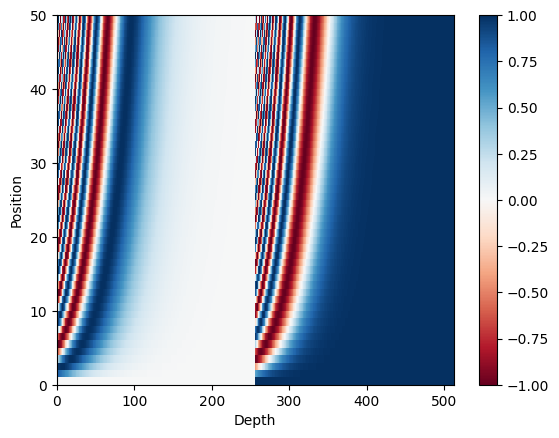

In [20]:
pencoding_sample = PEncoding(50, 512)

pyplt.pcolormesh(pencoding_sample.pencode.numpy()[0], cmap = 'RdBu')
pyplt.xlabel('Depth')
pyplt.xlim((0, 512))
pyplt.ylabel('Position')
pyplt.colorbar()
pyplt.show()

### Step 3. Implement Encoder Layer

The implementation of Encoder Layer (enclayer) involves:
1. Creation of MHAttention object
2. Two dense layers 

Implementation details as shown below:

In [21]:
def enclayer(i, dm, nhd, drop, name="enclayer"):
  inNodes = tflow.keras.Input(shape=(None, dm), name="inNodes")
  pmask = tflow.keras.Input(shape=(1, 1, None), name="pmask")

  att = MHAttention(
      dm, nhd, name="att")({
          'q': inNodes,
          'k': inNodes,
          'v': inNodes,
          'm': pmask
      })
  att = tflow.keras.layers.Dropout(rate=drop)(att)
  att = tflow.keras.layers.LayerNormalization(
      epsilon=1e-6)(inNodes + att)

  outNodes = tflow.keras.layers.Dense(units=i, activation='relu')(att)
  outNodes = tflow.keras.layers.Dense(units=dm)(outNodes)
  outNodes = tflow.keras.layers.Dropout(rate=drop)(outNodes)
  outNodes = tflow.keras.layers.LayerNormalization(
      epsilon=1e-6)(att + outNodes)

  return tflow.keras.Model(
      inputs=[inNodes, pmask], outputs=outNodes, name=name)

Try to display a sample Encoder Layer by using Keras plot_model():

In [22]:
enclayer_sample = enclayer(i = 512, dm = 128, nhd = 4, drop = 0.3, name = "enclayer")
tflow.keras.utils.plot_model(enclayer_sample, to_file = 'enclayer.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Step 4. Implement Encoder

The implementation of the Encoder involves the following processes:
1. Embedding the inputs
2. Perform the positional encoding scheme
3. Encode the Num_Layers


In [23]:
# Implementation of Encoder Class
def encoder(svcab,
            nlayers,
            x,
            dm,
            nhd,
            drop,
            name="encoder"):   
  inNodes = tflow.keras.Input(shape=(None,), name="inNodes")
  pmask = tflow.keras.Input(shape=(1, 1, None), name="pmask")

  embeddings = tflow.keras.layers.Embedding(svcab, dm)(inNodes)
  embeddings *= tflow.math.sqrt(tflow.cast(dm, tflow.float32))
  embeddings = PEncoding(svcab, dm)(embeddings)

  outNodes = tflow.keras.layers.Dropout(rate=drop)(embeddings)

  for i in range(nlayers):
    outNodes = enclayer(
        i=x,
        dm=dm,
        nhd=nhd,
        drop=drop,
        name="enclayer_{}".format(i),
    )([outNodes, pmask])


  return tflow.keras.Model(
      inputs=[inNodes, pmask], outputs=outNodes, name=name)

Try to display a sample Encoder by using Keras Plot_model:

In [24]:
encoder_sample = encoder(svcab = 8192, 
                         nlayers = 2,
                         x = 512,
                         dm = 128,
                         nhd = 4, 
                         drop = 0.3,
                         name = "encoder_sample")

tflow.keras.utils.plot_model(encoder_sample, to_file='encoder_sample.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Step 5. Implement Decoder Layer

The implementation of Decoder Layer involves the following steps:
1. Implement the MHAttention
2. Implement 2 Dense Decoder Layers with dropout


In [25]:
# Implementation of Decoder Layer (declayer)
def declayer(i, dm, nhd, drop, name = "declayer"):
    inNodes = tflow.keras.Input(shape=(None, dm), name = 'inNodes')
    encouts = tflow.keras.Input(shape=(None, dm), name="encouts")
    lamask = tflow.keras.Input(shape=(1, None, None), name = "lamask")
    pmask = tflow.keras.Input(shape=(1, 1, None), name = "pmask")
    
    att1 = MHAttention(dm, nhd, name="att1")(inNodes={'q':inNodes,
                                                     'k':inNodes, 
                                                     'v':inNodes, 
                                                     'm':lamask})
    
    att1 = tflow.keras.layers.LayerNormalization(epsilon=1e-6)(att1 + inNodes)
    
    att2 = MHAttention(dm,nhd, name = "att2")(inNodes={'q':att1,
                                                      'k':encouts,
                                                      'v':encouts,
                                                      'm':pmask})
    att2 = tflow.keras.layers.Dropout(rate=drop)(att2)
    att2 = tflow.keras.layers.LayerNormalization(epsilon = 1e-6)(att2 + att1)
    
    outNodes = tflow.keras.layers.Dense(units=i, activation='relu')(att2)
    outNodes = tflow.keras.layers.Dense(units=dm)(outNodes)
    outNodes = tflow.keras.layers.Dropout(rate=drop)(outNodes)
    outNodes = tflow.keras.layers.LayerNormalization(epsilon=1e-6)(outNodes + att2)
    
    return tflow.keras.Model(inputs=[inNodes, encouts, lamask, pmask], 
                          outputs = outNodes,
                          name = name)

<img src="./note.png" width = "" height = "" alt="note" align=left />

1.	Different from the Encoder Layer which implement one Atten-tion Learning object, the Decoder Layer implement two Atten-tion Learning object att1 and att2 according to the Transform-er Learning model. 
2.	Again, by default we are using “Relu” function as the Activation Func-tion. Reader can modify or adopt different Activation Function to im-prove the network performance as discussed in Workshop 16.1.

Try to display a sample Decoder Layer by using Keras plot_model():

In [26]:
declayer_sample = declayer(i = 512, dm = 128, nhd = 4, drop = 0.3, name = "declayer_sample")
tflow.keras.utils.plot_model(declayer_sample, to_file='declayer_sample.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Step 6. Implement Decoder

The implementation of the Decoder inovles the following processes:
1. Embedded the network outputs
2. Look ahead and padding masking
3. Positional encoding scheme 
4. Perform the N-decoder layers


In [27]:
# Implementation of Decoder Class
def decoder(svcab,
            nlayers,
            x,
            dm,
            nhd,
            drop,
            name='decoder'):
    inNodes  = tflow.keras.Input(shape=(None,), name='inNodes')
    encouts = tflow.keras.Input(shape=(None, dm), name='encouts')
    lamask  = tflow.keras.Input(shape=(1, None, None), name="lamask")
    pmask   = tflow.keras.Input(shape=(1, 1, None), name="pmask")
    
    embeddings = tflow.keras.layers.Embedding(svcab, dm)(inNodes)
    embeddings *= tflow.math.sqrt(tflow.cast(dm, tflow.float32))
    embeddings = PEncoding(svcab, dm)(embeddings)
    
    outNodes = tflow.keras.layers.Dropout(rate=drop)(embeddings)
    
    for i in range(nlayers):
        outNodes = declayer(i = x,
                           dm=dm,
                           nhd=nhd,
                           drop=drop,
                           name = 'declayer_{}'.format(i),)(inputs=[outNodes, encouts, lamask, pmask])
        
        return tflow.keras.Model(inputs=[inNodes, encouts, lamask, pmask],
                              outputs = outNodes,
                              name = name)

Try to display a sample Decoder by using Keras Plot_model:

In [28]:
decoder_sample = decoder(svcab=8192,
                         nlayers=2,
                         x = 512,
                         dm = 128,
                         nhd = 4,
                         drop = 0.3,
                         name = "decoder_sample")
tflow.keras.utils.plot_model(decoder_sample, to_file='decoder_sample.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Step 7. Implment Transformer

The implementation of the Transformer involves the following processes:
1. Implement the Encoder
2. Implement the Decoder
3. Implement the Final Linear Layer

As a Recurrent Neural Network (RNN), the output of the Decoder of the transformer is the input to the Linear Layer and the model output is being returned. 

In [29]:
# Implementation of the Transformer
def transformer(svcab,
                nlayers,
                x,
                dm,
                nhd,
                drop,
                name="transformer"):
    queries = tflow.keras.Input(shape=(None,), name="inNodes")
    dec_queries = tflow.keras.Input(shape=(None,), name="decNodes")
    
    enc_pmask = tflow.keras.layers.Lambda(
    gen_pmask, output_shape=(1, 1, None),
    name="enc_pmask")(queries)
 
    # Perform Look Ahead Masking for the Decoder Input for the Att1 
    lamask = tflow.keras.layers.Lambda(gen_lamask,
                                       output_shape=(1, None, None),
                                       name = "lamask")(dec_queries)
    
    # Perform Padding Masking for the Encoder Output for the Att2
    dec_pmask = tflow.keras.layers.Lambda(gen_pmask,
                                          output_shape=(1, 1, None),
                                          name="dec_pmask")(queries)
    
    encouts = encoder(svcab=svcab,
                      nlayers = nlayers,
                      x = x,
                      dm = dm,
                      nhd = nhd,
                      drop = drop,)(inputs = [queries, enc_pmask])
    
    decouts = decoder(svcab=svcab,
                      nlayers = nlayers,
                      x = x,
                      dm = dm,
                      nhd = nhd,
                      drop=drop,)(inputs=[dec_queries, encouts, lamask, dec_pmask])
    
    responses = tflow.keras.layers.Dense(units=svcab, name="outNodes")(decouts)
    
    return tflow.keras.Model(inputs=[queries, dec_queries], outputs=responses, name=name)

Try to display a sample transformer object by using Keras Plot_model:

In [30]:
transformer_sample = transformer(svcab=8192,
                                 nlayers=4,
                                 x=512,
                                 dm=128,
                                 nhd = 4,
                                 drop=0.3,
                                 name="transformer_sample")

tflow.keras.utils.plot_model(transformer_sample, to_file="transformer_sample.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Step 8. Model Training

In order to speed up the training process, the parameters for nLayers, dm and units (x) have been reduced. 


In [31]:
tflow.keras.backend.clear_session()

model = transformer(svcab = SVCAB,
                    nlayers=2,
                    x=512,
                    dm=256,
                    nhd=8,
                    drop=0.1)

<img src="./note.png" width = "" height = "" alt="note" align=left />

1.	According to the Transformer Model shown in Fig. 16.2, our Movie Chatbot Transformer Model consists of two layers, with 512 units, data-model size 256, head number 8 and dropout rate 0.1.
2.	Of course, readers are highly recommended to modify these parameter setting to improve the network performance as discussed in Work-shop 16.1.


### Step 9. Implement Evaluation Function

For system evaluation, a loss function is implemented as usual.
Since the target sequences are padded, it is important to apply a padding mask when calculating the loss.

In [32]:
# Implementation of the Evaluation Function (Loss Function)
def Eval_function(xtrue, xpred):
    xtrue = tflow.reshape(xtrue, shape=(-1, MLEN - 1))
    
    loss_val = tflow.keras.losses.SparseCategoricalCrossentropy(
    from_logits= True, reduction='none')(xtrue, xpred)
    
    mask_val = tflow.cast(tflow.not_equal(xtrue, 0), tflow.float32)
    loss_val = tflow.multiply(loss_val, mask_val)
    
    return tflow.reduce_mean(loss_val)

### Step 10. Implement Customerized Learning Rate

Apply the Adam_Optimizer with customerized learning rate with the following formulation:

$$l_{rate}=d^{-0.5}_{model}*min(step\_num^{-0.5}, step\_num * warmup\_steps^{-1.5})$$

In [33]:
# Implementation of Customerized Learning Rate
class CLearning(tflow.keras.optimizers.schedules.LearningRateSchedule):
    
    def __init__(self, dm, warmup_steps=4000):
        super(CLearning, self).__init__()
        
        self.dm = dm
        self.dm = tflow.cast(self.dm, tflow.float32)
        
        
        self.warmup_steps = warmup_steps
        
    def __call__(self, step):
        arg1 = tflow.math.rsqrt(tflow.cast(step, tflow.float32))
        arg2 = tflow.cast(step, tflow.float32) * (tflow.cast(self.warmup_steps, tflow.float32)**-1.5)
        
        return tflow.math.rsqrt(self.dm) * tflow.math.minimum(arg1, arg2)

Try to plot a customerized Learning Rate:

Text(0.5, 0, 'Train Step')

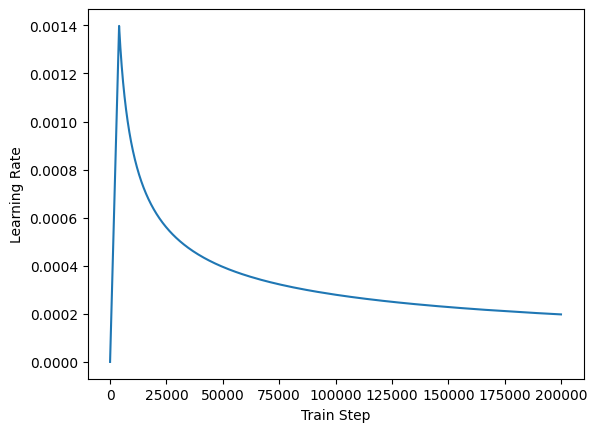

In [34]:
CLearning_sample = CLearning(dm=128)

pyplt.plot(CLearning_sample(tflow.range(200000, dtype=tflow.float32)))
pyplt.ylabel("Learning Rate")
pyplt.xlabel("Train Step")

### Step 11. Compile the Chatbot Model

In [35]:
cLRate = CLearning(256)
optimizer = tflow.keras.optimizers.Adam(learning_rate=cLRate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(xtrue, xpred):
    xtrue = tflow.reshape(xtrue, shape=(-1, MLEN - 1))
    return tflow.keras.metrics.sparse_categorical_accuracy(xtrue, xpred)

model.compile(optimizer=optimizer, loss=Eval_function, metrics=[accuracy])

### Step 12. Model Fitting

Train our Chatbot transformer model by simply calling `model.fit()` for (says) 20 epochs to save the time. 

In [36]:
EPOCHS = 20

model.fit(mDS, epochs = EPOCHS)

Epoch 1/20
689/689 [==============================] - 447s 641ms/step - loss: 2.1169 - accuracy: 0.0416
Epoch 2/20
689/689 [==============================] - 495s 718ms/step - loss: 1.4987 - accuracy: 0.0787
Epoch 3/20
689/689 [==============================] - 480s 696ms/step - loss: 1.3911 - accuracy: 0.0854
Epoch 4/20
689/689 [==============================] - 483s 701ms/step - loss: 1.3261 - accuracy: 0.0899
Epoch 5/20
689/689 [==============================] - 487s 706ms/step - loss: 1.2708 - accuracy: 0.0941
Epoch 6/20
689/689 [==============================] - 485s 704ms/step - loss: 1.2238 - accuracy: 0.0974
Epoch 7/20
689/689 [==============================] - 486s 705ms/step - loss: 1.1711 - accuracy: 0.1018
Epoch 8/20
689/689 [==============================] - 488s 708ms/step - loss: 1.1144 - accuracy: 0.1069
Epoch 9/20
689/689 [==============================] - 489s 710ms/step - loss: 1.0637 - accuracy: 0.1126
Epoch 10/20
689/689 [==============================] - 485s 703m

### Step 13. System Evaluation and Live Chatting

The implementation of system evalutation and live chatting involves following steps:
1. Create the Mining() method by first perform the data preprecossing of all utterances. 
2. Perform the tokenization of the utterances and padded with the START and END Tokens. 
3. Perform the LookAhead and Padding Masks.
4. Construct the Transformer model with Attention Learning.
5. Implement the chatting() method by perform the decoder scheme. 
6. Combine the chatted word sequences to the decoder input. 
7. By using the Transformer Model, the system will try to predict the response based on the previous training epochs. 


In [37]:
# Implementation of Movie Chatting class - mchat
def mchat(utterance):
    # Utterance Preprocessing and add the START AND END TOKENS
    utterance = pp_utterance(utterance)   
    utterance = tflow.expand_dims(START_TOKEN + m_token.encode(utterance) + END_TOKEN, axis = 0)
    
    # Create the response object
    response = tflow.expand_dims(START_TOKEN, 0)
    
    for i in range(MLEN):
        chatting = model(inputs = [utterance, response], training = False)
        
        # Choose last_word from the token sequence
        chatting = chatting[:, -1:, :]
        chatted_id = tflow.cast(tflow.argmax(chatting, axis=-1), tflow.int32)
        
        # Return with the response if the CHATTEDID is the same as the ENDTOKEN
        if tflow.equal(chatted_id, END_TOKEN[0]):
            break
            
        # Combine the CHATTEDID with the utterance response 
        response = tflow.concat([response, chatted_id], axis=-1)
        
    return tflow.squeeze(response, axis = 0)

# Implementation of main class for Movie Chatting - mchatting 
def mchatting(utterance):
    mchatting = mchat(utterance)
    
    chatted_utterance = m_token.decode([i for i in mchatting if i < m_token.vocab_size])
    
    print('Query: {}'.format(utterance))
    print('Response: {}'.format(chatted_utterance))
    
    return chatted_utterance

In [38]:
output = mchatting('Where have you been?')

Query: Where have you been?
Response: i m getting a little fast .


In [39]:
output = mchatting("It's a trap")

Query: It's a trap
Response: i don t know what to do . it s not that mean , we re going to do this to us anyway ? i m not going .


In [40]:
output = mchatting("Do you need help?")

Query: Do you need help?
Response: i don t know . i don t know .


In [41]:
output = mchatting("What do you think?")

Query: What do you think?
Response: i don t know . i don t know . i don t know . i don t think so . it s true ?


In [42]:
output = mchatting("Are you happy?")

Query: Are you happy?
Response: i m not sure . i m very good at you .


<img src="./note.png" width = "" height = "" alt="note" align=left />

1. As one can see from the training performance, from epochs 1 to 20, although rather slow, the accuracy keep on increasing whereas the loss rate keep on decreasing. 
2. If you try two experiments, one with 2 epochs and the other using 20 epochs. The chatbot performance for the 20 epochs is totally different and much better than the one with only 2 epochs. 
3. As a simple excerise, you can increase the epochs (says) up to 50 epochs (of course it will take a longer time unless you have sufficient GPUs) to check whether the accuracy still keep on increasing. 

<img src="./workshop.png" width = "" height = "" alt="note" align=left />

### Workshop 7.1 Fine-tune the Chatbot Model

In this workshop, we learnt how to use TensorFlow and Transformer Technology to develop a domain-based Chatbot system. 
Just like any AI model, there are many rooms to fine-tune the model to improve the system performance. 
The system fine-tuning can be conducted in the following directions:
1. Dataset Level
  - Enhance the preprocessing process 
  - Improve data record selection scheme e.g. sample size, utterance max length, etc. 
2. Network Model Level
  - Fine-tune the system parameters e.g. Learning Rate, Learning Method, etc. 
  - Fine-tune Transformer Model by the modification of the Attention Function, etc. 

Fine-tune your Movie Chatbot model and compare it with the original version. 


In [2]:
import tensorflow as tflow
tflow.random.set_seed(1234)

# !pip install tensorflow-datasets==1.2.0
import tensorflow_datasets as tflowDS

import re
import matplotlib.pyplot as pyplt


In [7]:
"""
Key changes include:

The preprocessing function now also removes non-alphanumeric characters (except for some punctuations), providing a cleaner dataset.
Added a filter for utterance length to exclude very short or very long utterances, improving data quality.
The get_dialogs function now only adds pairs of queries and answers to the dataset if both are valid after preprocessing.
"""
# Set the maximum number of training conversation 
MAX_CONV = 50000

# Improved Preprocessing Function
def pp_utterance(utterance):
    utterance = utterance.lower().strip()
    # Add a space to the following special characters
    utterance = re.sub(r"([?.!,])", r" \\1 ", utterance)
    # Delete extra spaces
    utterance = re.sub(r'[" "]+', " ", utterance)
    # Replace non-alphanumeric characters with spaces, keeping movie-specific punctuations
    utterance = re.sub(r"[^a-zA-Z0-9?.,!]+", " ", utterance)
    utterance = utterance.strip()
    # Filter out too short or too long utterances
    if len(utterance.split()) < 2 or len(utterance.split()) > 50:
        return None
    return utterance

# Enhanced Data Selection and Processing
def get_dialogs():
    id2dlogs = {}
    with open('data/movie_lines.txt', encoding='utf-8', errors='ignore') as f_dlogs:
        dlogs = f_dlogs.readlines()
    for dlog in dlogs:
        sections = dlog.replace('\\n', '').split(' +++$+++ ')
        id2dlogs[sections[0]] = sections[4]
        
    query, ans = [], []
    with open('data/movie_conversations.txt', encoding='utf-8', errors='ignore') as f_conv:
        convs = f_conv.readlines()
    for conv in convs:
        sections = conv.replace('\\n', '').split(' +++$+++ ')
        m_conv = [conv[1:-1] for conv in sections[3][1:-1].split(', ')]
        for i in range(len(m_conv) - 1):
            line_id_q = m_conv[i]
            line_id_a = m_conv[i + 1]
            if line_id_q in id2dlogs and line_id_a in id2dlogs:
                q = pp_utterance(id2dlogs[line_id_q])
                a = pp_utterance(id2dlogs[line_id_a])
                if q and a and len(query) < MAX_CONV:
                    query.append(q)
                    ans.append(a)
            else:
                print(f"Missing line ID: {line_id_q} or {line_id_a}")
    return query, ans

In [8]:
# Create the Movie Token object
m_token = tflowDS.deprecated.text.SubwordTextEncoder.build_from_corpus(queries + responses, target_vocab_size = 2**13)

# Set the Start and End tokens
START_TOKEN, END_TOKEN = [m_token.vocab_size], [m_token.vocab_size + 1]

# Set the size of Vocab (SVCAB)
SVCAB = m_token.vocab_size + 2

In [9]:
# Set the maximum length of each utterance (MLEN) to 50
MLEN = 40

# Performs the filtering and padding of each utterance
def filter_pad (qq, aa):
    m_token_qq, m_token_aa = [], []
    
    for (utterance1, utterance2) in zip(qq, aa):
        utterance1 = START_TOKEN + m_token.encode(utterance1) + END_TOKEN
        utterance2 = START_TOKEN + m_token.encode(utterance2) + END_TOKEN
        if len(utterance1) <= MLEN and len(utterance2) <= MLEN:
            m_token_qq.append(utterance1)
            m_token_aa.append(utterance2)
            
    # pad tokenized sentences
    m_token_qq = tflow.keras.preprocessing.sequence.pad_sequences(m_token_qq, maxlen=MLEN, padding = 'post')
    m_token_aa = tflow.keras.preprocessing.sequence.pad_sequences(m_token_aa, maxlen=MLEN, padding = 'post')
    
    return m_token_qq, m_token_aa

queries, responses = filter_pad (queries, responses)

In [10]:
tflow.data.Dataset.from_tensor_slices?

Signature: tflow.data.Dataset.from_tensor_slices(tensors, name=None) -> 'DatasetV2'
Docstring:
Creates a `Dataset` whose elements are slices of the given tensors.

The given tensors are sliced along their first dimension. This operation
preserves the structure of the input tensors, removing the first dimension
of each tensor and using it as the dataset dimension. All input tensors
must have the same size in their first dimensions.

>>> # Slicing a 1D tensor produces scalar tensor elements.
>>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
>>> list(dataset.as_numpy_iterator())
[1, 2, 3]

>>> # Slicing a 2D tensor produces 1D tensor elements.
>>> dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4]])
>>> list(dataset.as_numpy_iterator())
[array([1, 2], dtype=int32), array([3, 4], dtype=int32)]

>>> # Slicing a tuple of 1D tensors produces tuple elements containing
>>> # scalar tensors.
>>> dataset = tf.data.Dataset.from_tensor_slices(([1, 2], [3, 4], [5, 6]))
>>> list(d

In [11]:
# Define the Batch and Buffer size 
sBatch = 64
sBuffer = 20000

# Create mDS object from TensorFlow class
mDS = tflow.data.Dataset.from_tensor_slices(({'inNodes':queries, 'decNodes':responses[:, :-1]},{'outNodes':responses[:, 1:]}))

mDS = mDS.cache()
mDS = mDS.shuffle(sBuffer)
mDS = mDS.batch(sBatch)
mDS = mDS.prefetch(tflow.data.experimental.AUTOTUNE)

In [13]:
# Calculate the Attention Weight, where Query (q), Key(k), Value(v), Mask(m)
def calc_attention(q, k, v, m):
    qk = tflow.matmul(q, k, transpose_b = True)
    dep = tflow.cast(tflow.shape(k)[-1], tflow.float32)
    mlogs = qk / tflow.math.sqrt(dep)
    
    # Use the masking for padding
    if m is not None:
        mlogs += (m * -1e9)
        
    # Apply softmax_normalization on the final axis of the utterance sequence
    att_wts = tflow.nn.softmax(mlogs, axis = -1)
    
    # Apply matmul() operation
    out_wts = tflow.matmul(att_wts, v)
    
    return out_wts

In [14]:
class MHAttention(tflow.keras.layers.Layer):

  def __init__(self, dm, nhd, name="MHAttention"):
    super(MHAttention, self).__init__(name=name)
    self.nhd = nhd
    self.dm  = dm

    assert dm % self.nhd == 0

    self.dep = dm // self.nhd

    self.qdes = tflow.keras.layers.Dense(units=dm)
    self.kdes = tflow.keras.layers.Dense(units=dm)
    self.vdes = tflow.keras.layers.Dense(units=dm)

    self.des = tflow.keras.layers.Dense(units=dm)

  def sheads(self, inNodes, bsize):
    inNodes = tflow.reshape(
        inNodes, shape=(bsize, -1, self.nhd, self.dep))
    return tflow.transpose(inNodes, perm=[0, 2, 1, 3])

  def call(self, inNodes):
    q, k, v, m = inNodes['q'], inNodes['k'], inNodes['v'], inNodes['m']
    bsize = tflow.shape(q)[0]

    # 1. Construct Linear-layers
    q = self.qdes(q)
    k = self.kdes(k)
    v = self.vdes(v)

    # 2. Perform Head-splitting
    q = self.sheads(q, bsize)
    k = self.sheads(k, bsize)
    v = self.sheads(v, bsize)

    # 3. Calculate Attention Weights
    sattention = calc_attention(q, k, v, m)

    sattention = tflow.transpose(sattention, perm=[0, 2, 1, 3])

    # 4. Head Combining
    cattention = tflow.reshape(sattention,
                               (bsize, -1, self.dm))

    # 5. Layer Condensation
    outNodes = self.des(cattention)

    return outNodes

In [15]:
# Generate the Padding Mask (gen_pmask)
def gen_pmask(p):

    pmask = tflow.cast(tflow.math.equal(p, 0), tflow.float32)

    return pmask[:, tflow.newaxis, tflow.newaxis, :]

In [16]:
# Generate the Look_Ahead Mask (gen_lamask)
def gen_lamask(x):
    slen = tflow.shape(x)[1]
    lamask  = 1- tflow.linalg.band_part(tflow.ones((slen, slen)), -1, 0)
    pmask   = gen_pmask(x)

    return tflow.maximum(lamask, pmask)

In [17]:
# Implementation of the Positional Encoding Class (PEncoding)
class PEncoding(tflow.keras.layers.Layer):
    
    def __init__(self, pos, dm):
        super(PEncoding, self).__init__()
        self.pencode = self.pencods(pos, dm)
        
    def gdeg(self, pos, i, dm):
        deg = 1 / tflow.pow(10000,(2 * (i // 2)) / tflow.cast(dm, tflow.float32))
        return pos * deg
    
    def pencods(self, pos, dm):
        deg_rads = self.gdeg(pos = tflow.range(pos, dtype=tflow.float32)[:, tflow.newaxis], i=tflow.range(dm, dtype=tflow.float32)[tflow.newaxis, :], dm = dm)
        m_sin = tflow.math.sin(deg_rads[:, 1::2])
        m_cos = tflow.math.cos(deg_rads[:, 1::2])
        
        pencode = tflow.concat([m_sin, m_cos], axis = -1)
        pencode = pencode[tflow.newaxis, ...]
        return tflow.cast(pencode, tflow.float32)
    
    def call(self, inNodes):
        return inNodes + self.pencode[:, :tflow.shape(inNodes)[1], :]

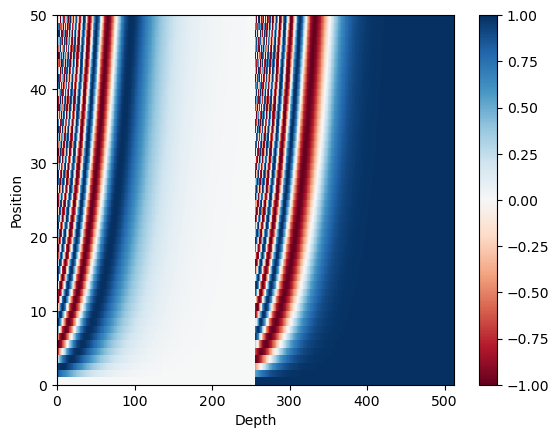

In [18]:
pencoding_sample = PEncoding(50, 512)

pyplt.pcolormesh(pencoding_sample.pencode.numpy()[0], cmap = 'RdBu')
pyplt.xlabel('Depth')
pyplt.xlim((0, 512))
pyplt.ylabel('Position')
pyplt.colorbar()
pyplt.show()

In [19]:
def enclayer(i, dm, nhd, drop, name="enclayer"):
  inNodes = tflow.keras.Input(shape=(None, dm), name="inNodes")
  pmask = tflow.keras.Input(shape=(1, 1, None), name="pmask")

  att = MHAttention(
      dm, nhd, name="att")({
          'q': inNodes,
          'k': inNodes,
          'v': inNodes,
          'm': pmask
      })
  att = tflow.keras.layers.Dropout(rate=drop)(att)
  att = tflow.keras.layers.LayerNormalization(
      epsilon=1e-6)(inNodes + att)

  outNodes = tflow.keras.layers.Dense(units=i, activation='sigmoid')(att)
  outNodes = tflow.keras.layers.Dense(units=dm)(outNodes)
  outNodes = tflow.keras.layers.Dropout(rate=drop)(outNodes)
  outNodes = tflow.keras.layers.LayerNormalization(
      epsilon=1e-6)(att + outNodes)

  return tflow.keras.Model(
      inputs=[inNodes, pmask], outputs=outNodes, name=name)

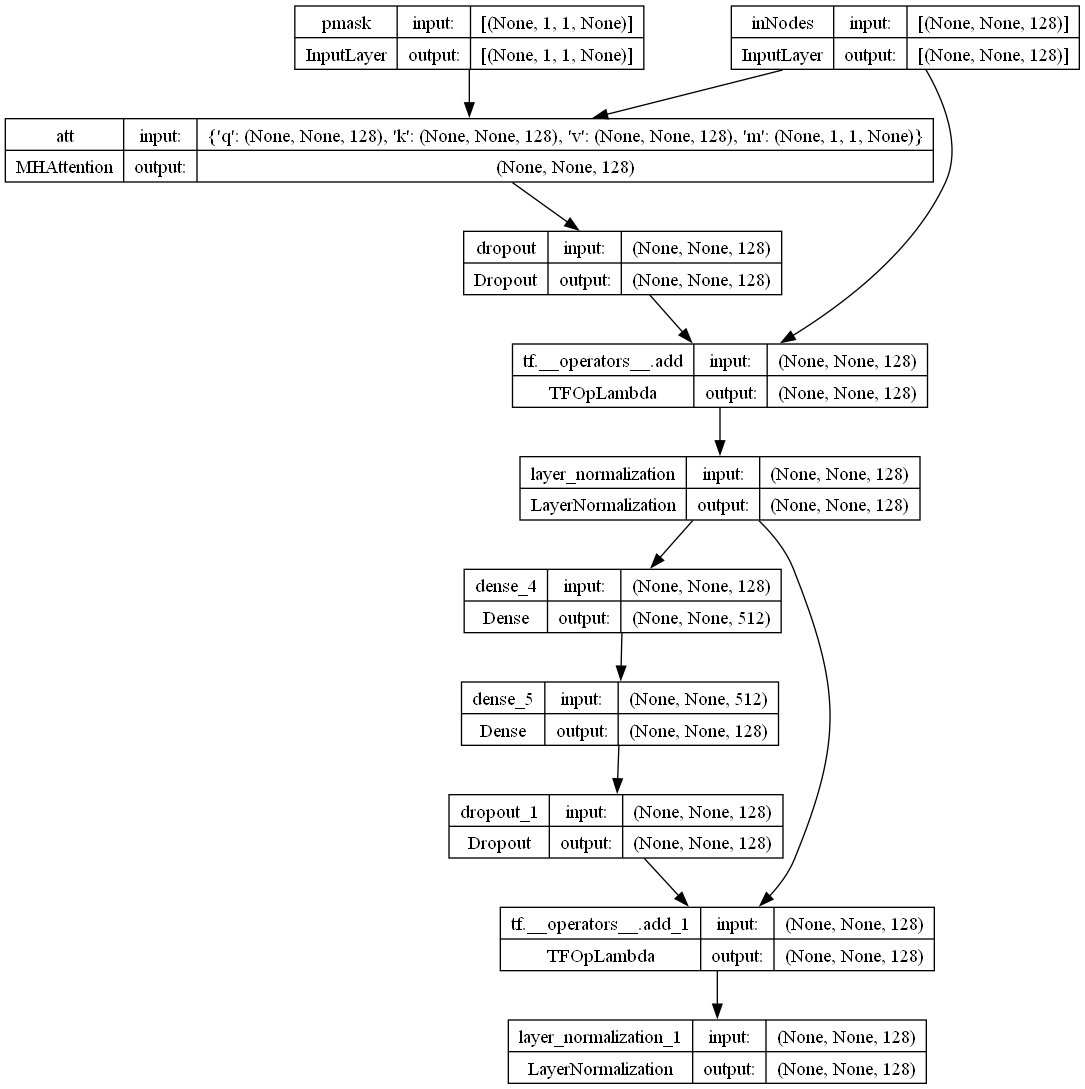

In [20]:
enclayer_sample = enclayer(i = 512, dm = 128, nhd = 4, drop = 0.3, name = "enclayer")
tflow.keras.utils.plot_model(enclayer_sample, to_file = 'enclayer.png', show_shapes = True)

In [21]:
# Implementation of Encoder Class
def encoder(svcab,
            nlayers,
            x,
            dm,
            nhd,
            drop,
            name="encoder"):   
  inNodes = tflow.keras.Input(shape=(None,), name="inNodes")
  pmask = tflow.keras.Input(shape=(1, 1, None), name="pmask")

  embeddings = tflow.keras.layers.Embedding(svcab, dm)(inNodes)
  embeddings *= tflow.math.sqrt(tflow.cast(dm, tflow.float32))
  embeddings = PEncoding(svcab, dm)(embeddings)

  outNodes = tflow.keras.layers.Dropout(rate=drop)(embeddings)

  for i in range(nlayers):
    outNodes = enclayer(
        i=x,
        dm=dm,
        nhd=nhd,
        drop=drop,
        name="enclayer_{}".format(i),
    )([outNodes, pmask])


  return tflow.keras.Model(
      inputs=[inNodes, pmask], outputs=outNodes, name=name)


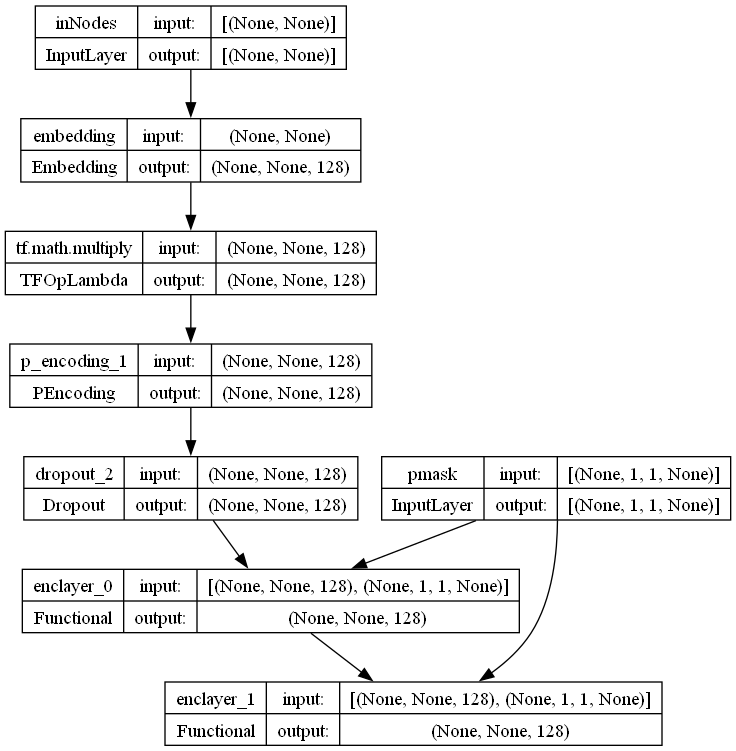

In [22]:
encoder_sample = encoder(svcab = 8192, 
                         nlayers = 2,
                         x = 512,
                         dm = 128,
                         nhd = 4, 
                         drop = 0.3,
                         name = "encoder_sample")

tflow.keras.utils.plot_model(encoder_sample, to_file='encoder_sample.png', show_shapes = True)


In [24]:
# Implementation of Decoder Layer (declayer)
def declayer(i, dm, nhd, drop, name = "declayer"):
    inNodes = tflow.keras.Input(shape=(None, dm), name = 'inNodes')
    encouts = tflow.keras.Input(shape=(None, dm), name="encouts")
    lamask = tflow.keras.Input(shape=(1, None, None), name = "lamask")
    pmask = tflow.keras.Input(shape=(1, 1, None), name = "pmask")
    
    att1 = MHAttention(dm, nhd, name="att1")(inNodes={'q':inNodes,
                                                     'k':inNodes, 
                                                     'v':inNodes, 
                                                     'm':lamask})
    
    att1 = tflow.keras.layers.LayerNormalization(epsilon=1e-6)(att1 + inNodes)
    
    att2 = MHAttention(dm,nhd, name = "att2")(inNodes={'q':att1,
                                                      'k':encouts,
                                                      'v':encouts,
                                                      'm':pmask})
    att2 = tflow.keras.layers.Dropout(rate=drop)(att2)
    att2 = tflow.keras.layers.LayerNormalization(epsilon = 1e-6)(att2 + att1)
    
    outNodes = tflow.keras.layers.Dense(units=i, activation='sigmoid')(att2)
    outNodes = tflow.keras.layers.Dense(units=dm)(outNodes)
    outNodes = tflow.keras.layers.Dropout(rate=drop)(outNodes)
    outNodes = tflow.keras.layers.LayerNormalization(epsilon=1e-6)(outNodes + att2)
    
    return tflow.keras.Model(inputs=[inNodes, encouts, lamask, pmask], 
                          outputs = outNodes,
                          name = name)


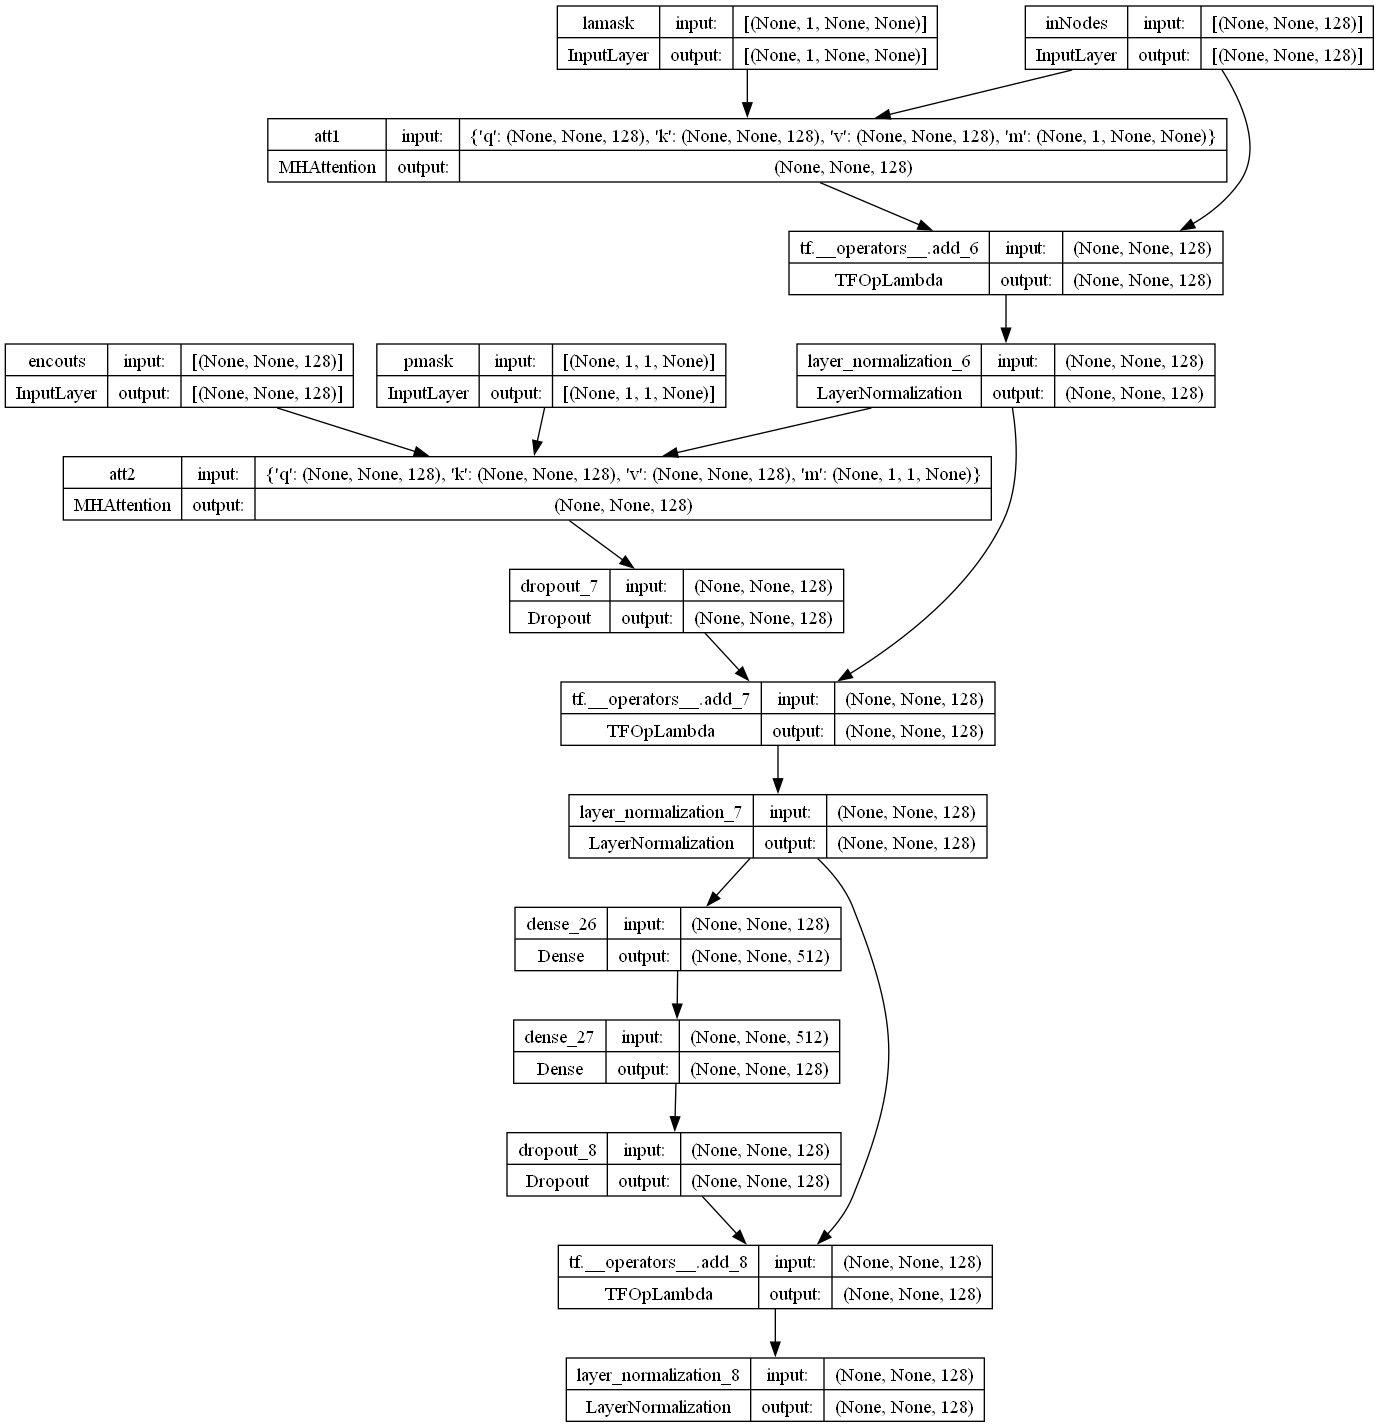

In [25]:
declayer_sample = declayer(i = 512, dm = 128, nhd = 4, drop = 0.3, name = "declayer_sample")
tflow.keras.utils.plot_model(declayer_sample, to_file='declayer_sample.png', show_shapes=True)

In [26]:
# Implementation of Decoder Class
def decoder(svcab,
            nlayers,
            x,
            dm,
            nhd,
            drop,
            name='decoder'):
    inNodes  = tflow.keras.Input(shape=(None,), name='inNodes')
    encouts = tflow.keras.Input(shape=(None, dm), name='encouts')
    lamask  = tflow.keras.Input(shape=(1, None, None), name="lamask")
    pmask   = tflow.keras.Input(shape=(1, 1, None), name="pmask")
    
    embeddings = tflow.keras.layers.Embedding(svcab, dm)(inNodes)
    embeddings *= tflow.math.sqrt(tflow.cast(dm, tflow.float32))
    embeddings = PEncoding(svcab, dm)(embeddings)
    
    outNodes = tflow.keras.layers.Dropout(rate=drop)(embeddings)
    
    for i in range(nlayers):
        outNodes = declayer(i = x,
                           dm=dm,
                           nhd=nhd,
                           drop=drop,
                           name = 'declayer_{}'.format(i),)(inputs=[outNodes, encouts, lamask, pmask])
        
        return tflow.keras.Model(inputs=[inNodes, encouts, lamask, pmask],
                              outputs = outNodes,
                              name = name)

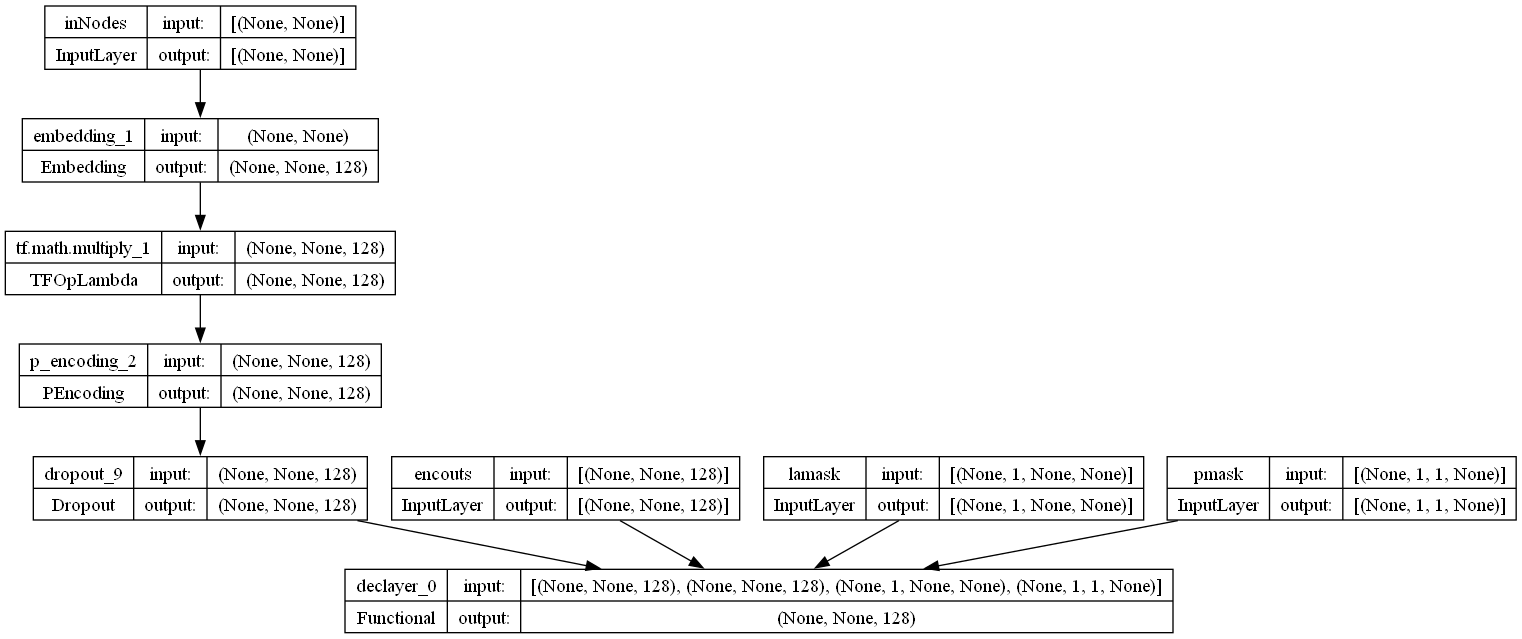

In [27]:
decoder_sample = decoder(svcab=8192,
                         nlayers=2,
                         x = 512,
                         dm = 128,
                         nhd = 4,
                         drop = 0.3,
                         name = "decoder_sample")
tflow.keras.utils.plot_model(decoder_sample, to_file='decoder_sample.png', show_shapes = True)

In [28]:
# Implementation of the Transformer
def transformer(svcab,
                nlayers,
                x,
                dm,
                nhd,
                drop,
                name="transformer"):
    queries = tflow.keras.Input(shape=(None,), name="inNodes")
    dec_queries = tflow.keras.Input(shape=(None,), name="decNodes")
    
    enc_pmask = tflow.keras.layers.Lambda(
    gen_pmask, output_shape=(1, 1, None),
    name="enc_pmask")(queries)
 
    # Perform Look Ahead Masking for the Decoder Input for the Att1 
    lamask = tflow.keras.layers.Lambda(gen_lamask,
                                       output_shape=(1, None, None),
                                       name = "lamask")(dec_queries)
    
    # Perform Padding Masking for the Encoder Output for the Att2
    dec_pmask = tflow.keras.layers.Lambda(gen_pmask,
                                          output_shape=(1, 1, None),
                                          name="dec_pmask")(queries)
    
    encouts = encoder(svcab=svcab,
                      nlayers = nlayers,
                      x = x,
                      dm = dm,
                      nhd = nhd,
                      drop = drop,)(inputs = [queries, enc_pmask])
    
    decouts = decoder(svcab=svcab,
                      nlayers = nlayers,
                      x = x,
                      dm = dm,
                      nhd = nhd,
                      drop=drop,)(inputs=[dec_queries, encouts, lamask, dec_pmask])
    
    responses = tflow.keras.layers.Dense(units=svcab, name="outNodes")(decouts)
    
    return tflow.keras.Model(inputs=[queries, dec_queries], outputs=responses, name=name)

In [29]:
transformer_sample = transformer(svcab=8192,
                                 nlayers=4,
                                 x=512,
                                 dm=128,
                                 nhd = 4,
                                 drop=0.3,
                                 name="transformer_sample")

tflow.keras.utils.plot_model(transformer_sample, to_file="transformer_sample.png", show_shapes=True)

tflow.keras.backend.clear_session()

In [30]:
model = transformer(svcab = SVCAB,
                    nlayers=2,
                    x=512,
                    dm=256,
                    nhd=8,
                    drop=0.1)


In [31]:
# Implementation of the Evaluation Function (Loss Function)
def Eval_function(xtrue, xpred):
    xtrue = tflow.reshape(xtrue, shape=(-1, MLEN - 1))
    
    loss_val = tflow.keras.losses.SparseCategoricalCrossentropy(
    from_logits= True, reduction='none')(xtrue, xpred)
    
    mask_val = tflow.cast(tflow.not_equal(xtrue, 0), tflow.float32)
    loss_val = tflow.multiply(loss_val, mask_val)
    
    return tflow.reduce_mean(loss_val)


In [51]:
# Implementation of Customerized Learning Rate
class CLearning(tflow.keras.optimizers.schedules.LearningRateSchedule):
    
    def __init__(self, dm, warmup_steps=5000):
        super(CLearning, self).__init__()
        
        self.dm = dm
        self.dm = tflow.cast(self.dm, tflow.float32)
        
        
        self.warmup_steps = warmup_steps
        
    def __call__(self, step):
        arg1 = tflow.math.rsqrt(tflow.cast(step, tflow.float32))
        arg2 = tflow.cast(step, tflow.float32) * (tflow.cast(self.warmup_steps, tflow.float32)**-1.5)
        
        return tflow.math.rsqrt(self.dm) * tflow.math.minimum(arg1, arg2)
    
CLearning_sample = CLearning(dm=128)

Text(0.5, 0, 'Train Step')

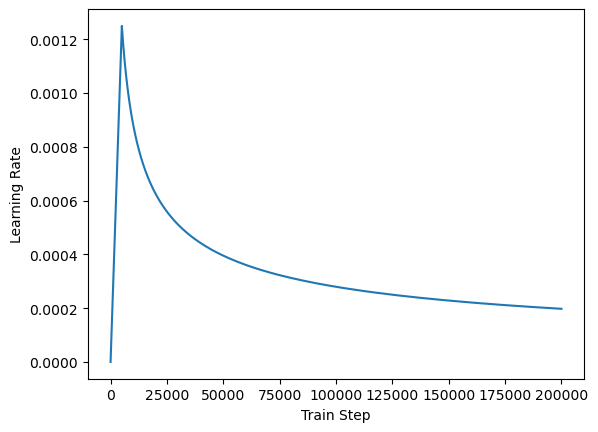

In [52]:
pyplt.plot(CLearning_sample(tflow.range(200000, dtype=tflow.float32)))
pyplt.ylabel("Learning Rate")
pyplt.xlabel("Train Step")

In [54]:
cLRate = CLearning(128)
optimizer = tflow.keras.optimizers.Adam(learning_rate=cLRate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

def accuracy(xtrue, xpred):
    xtrue = tflow.reshape(xtrue, shape=(-1, MLEN - 1))
    return tflow.keras.metrics.sparse_categorical_accuracy(xtrue, xpred)

model.compile(optimizer=optimizer, loss=Eval_function, metrics=[accuracy])


In [55]:
EPOCHS = 25

model.fit(mDS, epochs = EPOCHS)

Epoch 1/25



689/689 [==============================] - 292s 412ms/step - loss: 2.1280 - accuracy: 0.0389
Epoch 2/25
689/689 [==============================] - 281s 408ms/step - loss: 1.4909 - accuracy: 0.0796
Epoch 3/25
689/689 [==============================] - 297s 432ms/step - loss: 1.3664 - accuracy: 0.0871
Epoch 4/25
689/689 [==============================] - 286s 416ms/step - loss: 1.2859 - accuracy: 0.0925
Epoch 5/25
689/689 [==============================] - 305s 442ms/step - loss: 1.2155 - accuracy: 0.0968
Epoch 6/25
689/689 [==============================] - 219s 318ms/step - loss: 1.1550 - accuracy: 0.1008
Epoch 7/25
689/689 [==============================] - 122s 178ms/step - loss: 1.1038 - accuracy: 0.1043
Epoch 8/25
689/689 [==============================] - 125s 182ms/step - loss: 1.0560 - accuracy: 0.1081
Epoch 9/25
689/689 [==============================] - 126s 183ms/step - loss: 0.9902 - accuracy: 0.1148
Epoch 10/25
689/689 [==============================] - 124s 179ms/step - lo

In [56]:
# Implementation of Movie Chatting class - mchat
def mchat(utterance):
    # Utterance Preprocessing and add the START AND END TOKENS
    utterance = pp_utterance(utterance)   
    utterance = tflow.expand_dims(START_TOKEN + m_token.encode(utterance) + END_TOKEN, axis = 0)
    
    # Create the response object
    response = tflow.expand_dims(START_TOKEN, 0)
    
    for i in range(MLEN):
        chatting = model(inputs = [utterance, response], training = False)
        
        # Choose last_word from the token sequence
        chatting = chatting[:, -1:, :]
        chatted_id = tflow.cast(tflow.argmax(chatting, axis=-1), tflow.int32)
        
        # Return with the response if the CHATTEDID is the same as the ENDTOKEN
        if tflow.equal(chatted_id, END_TOKEN[0]):
            break
            
        # Combine the CHATTEDID with the utterance response 
        response = tflow.concat([response, chatted_id], axis=-1)
        
    return tflow.squeeze(response, axis = 0)


In [57]:
# Implementation of main class for Movie Chatting - mchatting 
def mchatting(utterance):
    mchatting = mchat(utterance)
    
    chatted_utterance = m_token.decode([i for i in mchatting if i < m_token.vocab_size])
    
    print('Query: {}'.format(utterance))
    print('Response: {}'.format(chatted_utterance))
    
    return chatted_utterance


In [58]:
output = mchatting('Where have you been?')


Query: Where have you been?
Response: i don t know .


In [59]:
output = mchatting("It's a trap")

Query: It's a trap
Response: i don t know what to do .


In [60]:
output = mchatting("Do you need help?")

Query: Do you need help?
Response: i don t want to talk about it .


In [61]:
output = mchatting("What do you think?")

Query: What do you think?
Response: i don t know . i just don t want to be divorced by some sort of makes dealing with vampires . what do you want ?


In [62]:
output = mchatting("Are you happy?")

Query: Are you happy?
Response: i m not sure . i just assumed . . .


## Comparative analysis
After fine-tuning, the accuracy of the chatbot has been improved to a certain extent. The quality of the generated answers has also been improved to a certain extent.

<img src="./workshop.png" width = "" height = "" alt="note" align=left />

### Workshop 7.2 Mini-project - Build a Semantic-Level AI Chatbot System

In this section, we learnt how to extend our works of Character-level and Word-level NLU to a Semantic-Level NLU.  

As a mini-project:
1. Modify the codes of the AI Chatbot learnt in this section, implement a Semantic-level AI Chatbot system.
2. Compare the system performance of this revised system with the pervious Character-level and Word-level AI Chatbot system. 

## 16.5 Summary

In this workshop, we have integrated all the NLP related implementation techniques including: TensorFlow and Keras with the Tranformer Technology for the design and implementation the utimate NLP application: AI-based chatbot system. By using Cornell Large Movie dataset with over 200,000 movie conversations by 10,000+ movie characters, we have step-by-step implement the data preprocessing, model construction, system training,testing and evaluation process by the adoption of Attention Learning and Transformer Technology with TensorFlow and Keras implementation platform,which can be easily applied to other chatbot domain and interactive QA systems. 

However, it is only the beginning for the journey of NLP development. Owing the popularity and the vast usability of NLP applications, almost every week there are new research and development and research in the areas of NLP. Below are some well known and popular domains and resources related to chatbot systems for reference. Hope you enjoy this workshop series!



#### Datasets for Chatbot Systems:
- Taskmaster from Google Research: https://github.com/google-research-datasets/Taskmaster/tree/master/TM-1-2019
- Simulated Dialogue dataset from Google Research: https://github.com/google-research-datasets/simulated-dialogue
- Dialog Challenge dataset from Microsoft: https://github.com/xiul-msr/e2e_dialog_challenge
- Dialog State Tracking Challenge dataset: https://github.com/matthen/dstc

#### Keras Modules and Optimizers:
- Keras layers: https://keras.io/api/layers/
- Keras optimizers: https://keras.io/api/optimizers/
- An overview of optimizers: https://ruder.io/optimizing-gradient-descent/
- Adam optimizer: https://arxiv.org/abs/1412.6980

#### Famous Chatbot Systems:
- Amazon Alexa developer blog: https://developer.amazon.com/blogs/home/tag/Alexa
- Google Assistant: https://assistant.google.com/
- Apple Siri Developer: https://developer.apple.com/siri/
- Microsoft Cortana Developer: https://www.microsoft.com/en-us/cortana/
- Samsung Bixby Developer: https://developer.samsung.com/bixby